# Разведочный анализ данных: продолжение

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

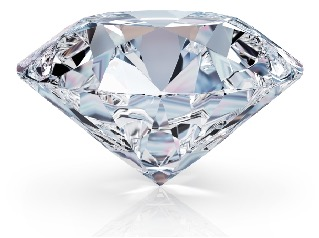

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DIAMONDS_DATASET = "/content/drive/MyDrive/!алгоритмы_понижения_размерности/diamonds_clean_encoded_data.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [ ]:
df.head()

,carat,depth,table,price,x,y,z,cut_encoded,clarity_encoded,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,4,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,3,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,3,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,1,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Исследование данных

Размер датасета

In [ ]:
df.shape

(53786, 16)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53786 entries, 0 to 53785
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            53786 non-null  float64
 1   depth            53786 non-null  float64
 2   table            53786 non-null  float64
 3   price            53786 non-null  float64
 4   x                53786 non-null  float64
 5   y                53786 non-null  float64
 6   z                53786 non-null  float64
 7   cut_encoded      53786 non-null  int64  
 8   clarity_encoded  53786 non-null  int64  
 9   color_D          53786 non-null  float64
 10  color_E          53786 non-null  float64
 11  color_F          53786 non-null  float64
 12  color_G          53786 non-null  float64
 13  color_H          53786 non-null  float64
 14  color_I          53786 non-null  float64
 15  color_J          53786 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 6.6 MB


## Взаимозависимость в данных

### 1. Корреляция

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

<Axes: >

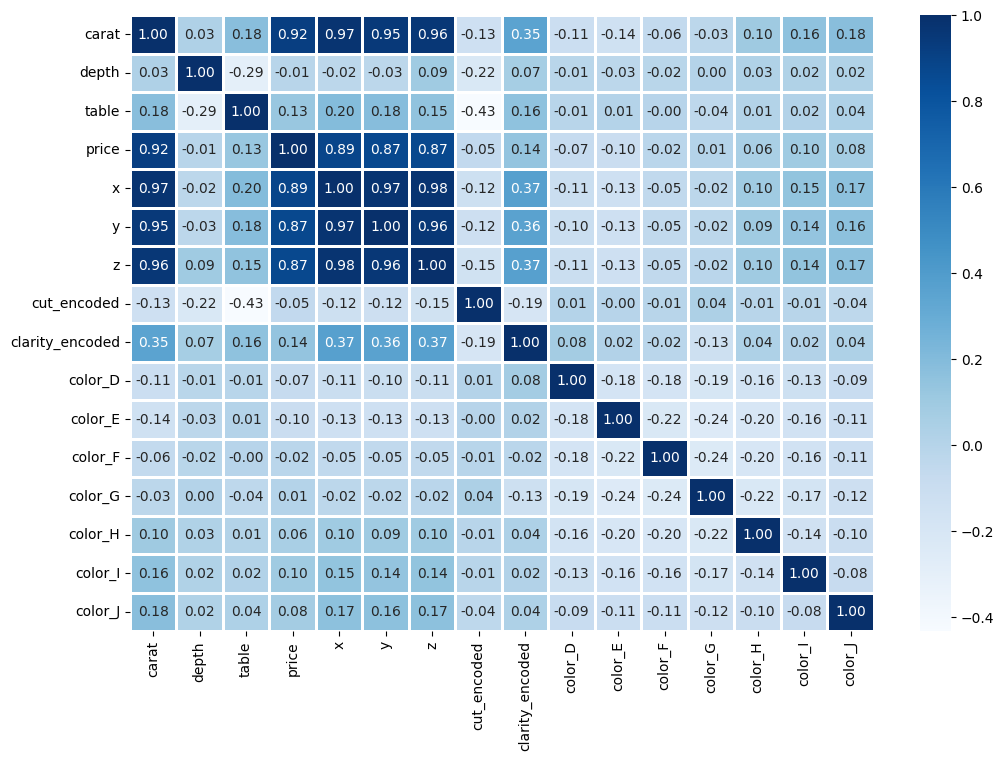

In [ ]:
corr = df.corr() # матрица корреляций

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f', linewidth=1)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

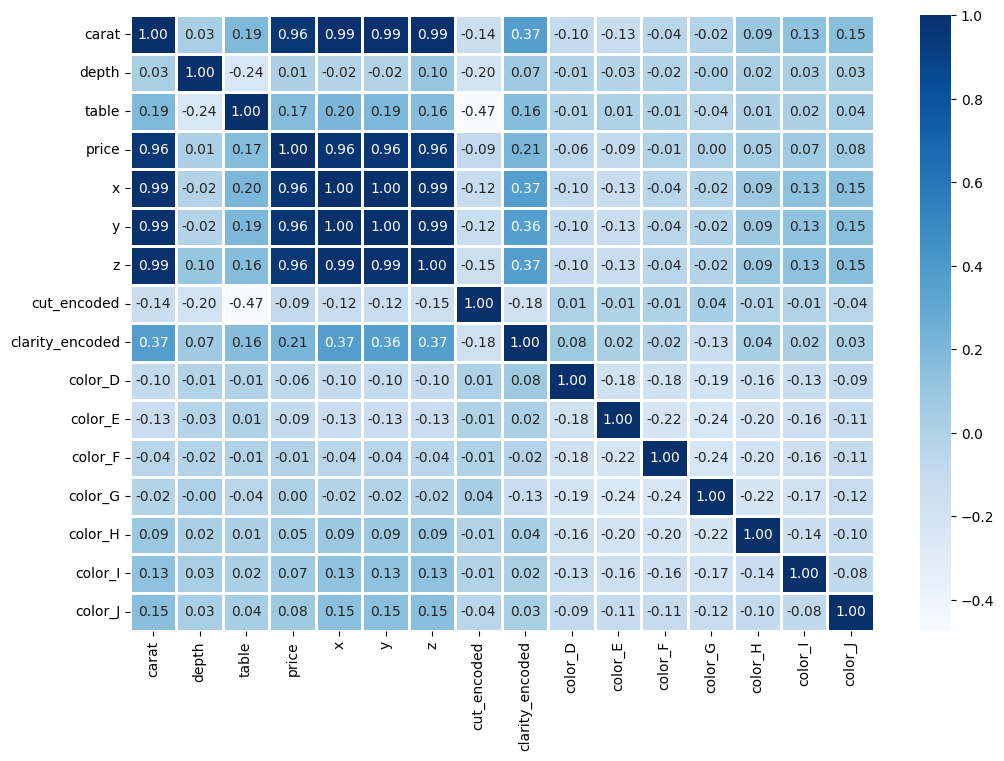

In [ ]:
corr = df.corr(method='spearman')

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f', linewidth=1);

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

### Задание 1

Вычислите матрицу корреляций, используя корреляцию Кендалла.

С каким столбцом коррелирует в этой матрице `depth` больше всего?

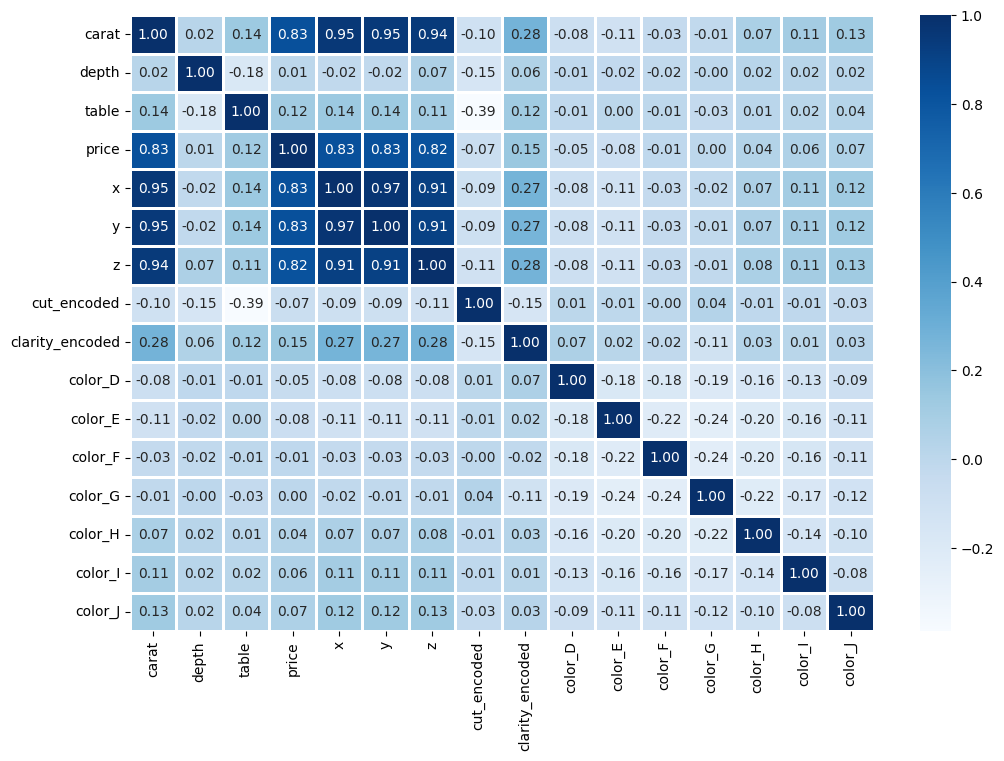

In [ ]:
# depth больше всего коррелирует с table (-0.2)

corr = df.corr(method='kendall')

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Blues", annot=True, fmt='.2f', linewidth=1);

### 2. V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*

Для оценки степени взаимосвязи категориальных столбцов можно вычислять V-меру Крамера.
Это вариант нормировки статистики $\chi^2$. Статистика $\chi^2$ - это функция, измеряющая меру взаимосвязи двух категориальных переменных.

Пусть $X, Y$ - две категориальных переменных, тогда $\chi^2$ вычисляется по формуле

$$\chi^2(X,Y)=\sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}},$$

где $O_{ij}$ - наблюдаемая частота события, $E_{ij}$ - ожидаемая частота события (в предположении, что величины $X$ и $Y$ независимы).

Чем больше значение $\chi^2$ - тем больше степень взаимосвязи переменных $X$ и $Y$.



**Покажем на примере.**

Изучим по некоторым данным зависимость факта курения и повышенного давления. По данным составим таблицу сопряженности.

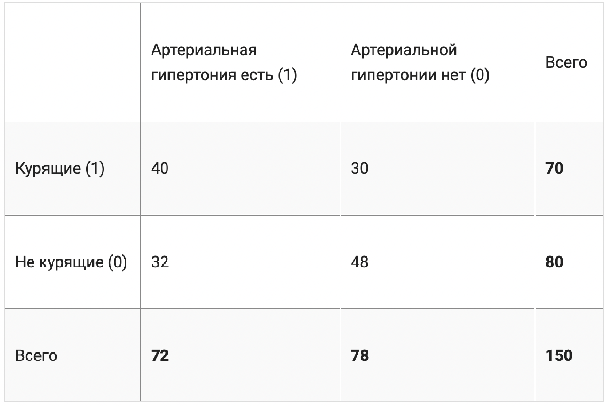

Вычисляем $\chi^2$:

$O_{11} = 40$

$E_{11} = 70 * 72 / 150 \approx 33.6 $ (так считается $E_{ij}$, если величины независимы)

Аналогично вычисляются оставшиеся слагаемые в формуле. Получаем

$\chi^2(X,Y) = (40-33.6)^2/33.6 + (30-36.4)^2/36.4 + (32-38.4)^2/38.4 + (48-41.6)^2/41.6 = 4.396$



Чем больше $\chi^2$, тем больше взаимосвязь между признаками.

В случае, если признаки независимы, то ожидаемая и наблюдаемая частоты совпадут, и $\chi^2=0$.



V-мера Крамера - это нормировка $\chi^2$ на число значений в каждой категории:

$$V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}},$$

где


$n$ - общее число наблюдений

$k$ - число категорий в $X$

$r$ - число категорий в $Y$


В результате этой нормировки V-мера находится на отрезке от 0 до 1 и легко интерпретируется: *чем больше V-мера - тем больше зависимость между двумя переменными, и наоборот.*

In [ ]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


#### Загрузка датасета с категориальными данными

In [ ]:
DIAMONDS_CATEGORY_DATASET = "/content/drive/MyDrive/!алгоритмы_понижения_размерности/diamonds_clean_data.csv"

df_category = pd.read_csv(DIAMONDS_CATEGORY_DATASET)

In [ ]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53786 entries, 0 to 53785
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   carat              53786 non-null  float64
 1   cut                53786 non-null  object 
 2   color              53786 non-null  object 
 3   clarity            53786 non-null  object 
 4   depth              53786 non-null  float64
 5   table              53786 non-null  float64
 6   price              53786 non-null  float64
 7   x                  53786 non-null  float64
 8   y                  53786 non-null  float64
 9   z                  53786 non-null  float64
 10  color_description  53786 non-null  object 
dtypes: float64(7), object(4)
memory usage: 4.5+ MB


In [ ]:
df_category = df_category.drop('color_description', axis=1)


#### Распределение цены
наибольшее количество алмазов с маленькой ценой

<Axes: xlabel='price', ylabel='Count'>

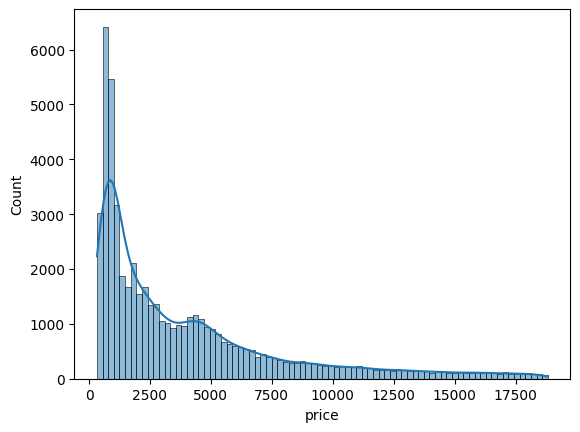

In [ ]:
sns.histplot(data = df_category['price'], kde = True)

14449


<Axes: xlabel='price', ylabel='Count'>

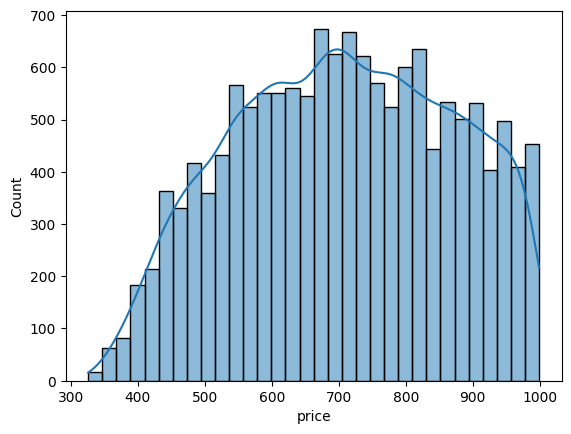

In [ ]:
print(len(df_category['price'][df_category['price'] < 1000]))
sns.histplot(data = df_category['price'][df_category['price'] < 1000], kde = True)

24653


<Axes: xlabel='price', ylabel='Count'>

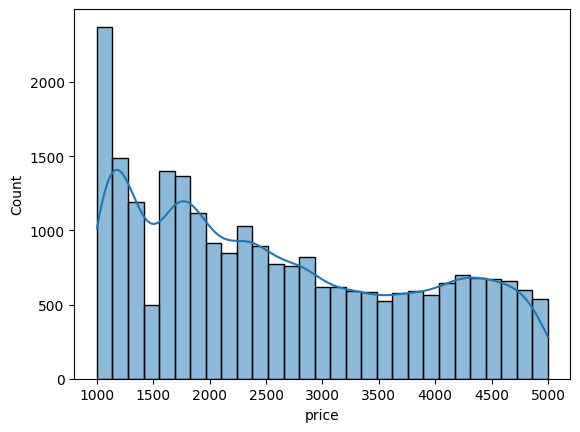

In [ ]:
print(len(df_category['price'][(df_category['price'] >= 1000) & (df_category['price'] < 5000)]))
sns.histplot(data = df_category['price'][(df_category['price'] >= 1000) & (df_category['price'] < 5000)], kde = True)

14684


<Axes: xlabel='price', ylabel='Count'>

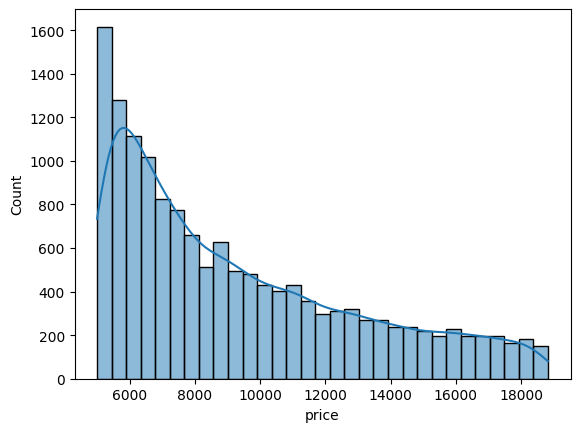

In [ ]:
print(len(df_category['price'][(df_category['price'] >= 5000)]))
sns.histplot(data = df_category['price'][(df_category['price'] >= 5000)], kde = True)

#### Разделение цены на 4 категории для применения V Крамера
делим цену на 4 квантеля с равным количеством объектов в каждой категории

In [ ]:
pd.qcut(df_category['price'], 4).value_counts()

,count
price,
"(325.999, 951.0]",13457
"(951.0, 2401.0]",13448
"(5324.0, 18823.0]",13446
"(2401.0, 5324.0]",13435


In [ ]:
df_category['price_quantile'] = pd.qcut(df_category['price'], 4)

#### Применение V Крамера
При разделении цены на квантили наибольшая связь у цены с clarity. Но значение их связности меньше 0.2.

In [ ]:
import association_metrics as am

df_cat = df_category.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

/usr/local/lib/python3.12/dist-packages/association_metrics/categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][y] = 1
/usr/local/lib/python3.12/dist-packages/association_metrics/categorical.py:104: FutureWarning

,cut,color,clarity,price_quantile
cut,1.000000,0.037698,0.142325,0.102999
color,0.037698,1.000000,0.079533,0.113081
clarity,0.142325,0.079533,1.000000,0.184233
price_quantile,0.102999,0.113081,0.184233,1.000000


### 3. ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [ ]:
# Generating sample data
import pandas as pd
ColumnNames=['FuelType','CarPrice']
DataValues= [
             [  'Petrol',   2000],
             [  'Petrol',   2100],
             [  'Petrol',   1900],
             [  'Petrol',   2150],
             [  'Petrol',   2100],
             [  'Petrol',   2200],
             [  'Petrol',   1950],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'Diesel',   2900],
             [  'Diesel',   2850],
             [  'Diesel',   2600],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'CNG',   1500],
             [  'CNG',   1400],
             [  'CNG',   1600],
             [  'CNG',   1650],
             [  'CNG',   1600],
             [  'CNG',   1500],
             [  'CNG',   1500]
           ]
#Create the Data Frame
CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)

########################################################
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list

CategoryGroupLists = CarData.groupby('FuelType')['CarPrice'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  4.3558466424602e-12
Features are correlated


In [ ]:
Data = []

for c1 in df_category.columns:
    for c2 in df_category.columns:
        if df_category[c1].dtype == 'object' and df_category[c2].dtype != 'object':
            CategoryGroupLists = df_category.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,cut,carat,Yes
1,cut,depth,Yes
2,cut,table,Yes
3,cut,price,Yes
4,cut,x,Yes
5,cut,y,Yes
6,cut,z,Yes
7,color,carat,Yes
8,color,depth,Yes
9,color,table,Yes


## Polars

В конце 2020 года в python стала доступна библиотека Polars.

Polars - это высокопроизводительная библиотека для манипуляции и анализа данных в Python и Rust. Она была создана как альтернатива Pandas, но с учетом возможностей параллельной обработки данных на многопроцессорных системах.

Одним из основных преимуществ Polars является его скорость работы с данными. Polars использует многопоточную обработку данных, что позволяет обрабатывать большие объемы данных на многопроцессорных системах в несколько раз быстрее, чем Pandas. Кроме того, Polars имеет более эффективную систему памяти, что позволяет работать с данными, которые не помещаются в оперативной памяти.


Хорошая [статья про сравнение Pandas и Polars](https://vc.ru/u/1389654-machine-learning/583603-pandas-vs-polars-sravnenie-sintaksisa-i-skorosti)

In [ ]:
df_big = df_category.copy()

for i in range(50):
  df_big = pd.concat([df_big, df_category])

df_big.to_csv("diamonds_big.csv", index=False)

In [ ]:
df_big.shape, df_category.shape

((2743086, 10), (53786, 10))

In [ ]:
!pip install polars

import polars as pl

print(pl.__version__)

1.31.0


### Загрузка данных

In [ ]:
%%time

df_pl = pl.read_csv("diamonds_big.csv")

CPU times: user 2.13 s, sys: 528 ms, total: 2.66 s
Wall time: 1.41 s


In [ ]:
%%time

df = pd.read_csv("diamonds_big.csv")

CPU times: user 2.43 s, sys: 1.02 s, total: 3.45 s
Wall time: 3.51 s


### Выбор и фильтрация данных

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [ ]:
%%time

df[['carat', 'depth']]

CPU times: user 8.58 ms, sys: 8.85 ms, total: 17.4 ms
Wall time: 17.4 ms


,carat,depth
0,0.23,61.5
1,0.21,59.8
2,0.23,56.9
3,0.29,62.4
4,0.31,63.3
...,...,...
2743081,0.72,60.8
2743082,0.72,63.1
2743083,0.70,62.8
2743084,0.86,61.0


In [ ]:
%%time

df_pl[['carat', 'depth']]

# df_pl.select(pl.col(['carat', 'depth']))

CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 2.38 ms


carat,depth
f64,f64
0.23,61.5
0.21,59.8
0.23,56.9
0.29,62.4
0.31,63.3
…,…
0.72,60.8
0.72,63.1
0.7,62.8


In [ ]:
# Pandas
%%time

df.query('carat > 5')

CPU times: user 22.8 ms, sys: 9.79 ms, total: 32.6 ms
Wall time: 30.6 ms


,carat,cut,color,clarity,depth,table,price,x,y,z
27341,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
81127,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
134913,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
188699,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
242485,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
296271,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
350057,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
403843,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
457629,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
511415,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98


In [ ]:
# Polars
%%time

df_pl.filter(pl.col('carat') > 5)

CPU times: user 5.68 ms, sys: 3.53 ms, total: 9.2 ms
Wall time: 12 ms


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
…,…,…,…,…,…,…,…,…,…
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98


### Задание 2

С помощью polars и pandas отфильтруйте таблицу, оставив в ней только строки, удовлетворяющие условиям:
* `color` = "J"
* `price` > 1000

Сравните время выполнения запросов

In [ ]:
# your code here
%%time

df[(df.color == 'J') & (df.price > 1000)]

CPU times: user 472 ms, sys: 979 µs, total: 473 ms
Wall time: 475 ms


,carat,cut,color,clarity,depth,table,price,x,y,z
172,1.17,Very Good,J,I1,60.2,61.0,2774.0,6.83,6.90,4.13
247,1.05,Very Good,J,SI2,63.2,56.0,2789.0,6.49,6.45,4.09
255,1.05,Fair,J,SI2,65.8,59.0,2789.0,6.41,6.27,4.18
324,1.00,Premium,J,SI2,62.3,58.0,2801.0,6.45,6.34,3.98
366,0.93,Premium,J,SI2,61.9,57.0,2807.0,6.21,6.19,3.84
...,...,...,...,...,...,...,...,...,...,...
2742848,0.90,Good,J,SI2,63.9,56.0,2717.0,6.17,6.10,3.92
2742933,0.90,Good,J,SI1,63.2,60.0,2729.0,6.09,6.12,3.86
2742994,0.82,Ideal,J,VS2,61.6,56.0,2741.0,6.00,6.04,3.71
2742998,0.83,Ideal,J,VS2,62.3,55.0,2742.0,6.01,6.03,3.75


In [ ]:
%%time

df_pl.filter((pl.col('color') == 'J') & (pl.col('price') > 1000))

CPU times: user 50.5 ms, sys: 3.83 ms, total: 54.3 ms
Wall time: 59.7 ms


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
1.17,"""Very Good""","""J""","""I1""",60.2,61.0,2774.0,6.83,6.9,4.13
1.05,"""Very Good""","""J""","""SI2""",63.2,56.0,2789.0,6.49,6.45,4.09
1.05,"""Fair""","""J""","""SI2""",65.8,59.0,2789.0,6.41,6.27,4.18
1.0,"""Premium""","""J""","""SI2""",62.3,58.0,2801.0,6.45,6.34,3.98
0.93,"""Premium""","""J""","""SI2""",61.9,57.0,2807.0,6.21,6.19,3.84
…,…,…,…,…,…,…,…,…,…
0.9,"""Good""","""J""","""SI2""",63.9,56.0,2717.0,6.17,6.1,3.92
0.9,"""Good""","""J""","""SI1""",63.2,60.0,2729.0,6.09,6.12,3.86
0.82,"""Ideal""","""J""","""VS2""",61.6,56.0,2741.0,6.0,6.04,3.71


### Агрегация данных

In [ ]:
df_pl.head()

carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75


In [ ]:
%%time

df.groupby('cut').agg({'table' : 'mean', 'price' : 'max'})

CPU times: user 212 ms, sys: 12 ms, total: 224 ms
Wall time: 233 ms


,table,price
cut,,
Fair,59.059236,18574.0
Good,58.675852,18707.0
Ideal,55.952866,18806.0
Premium,58.747878,18823.0
Very Good,57.956123,18818.0


In [ ]:
%%time

df_pl.group_by('cut').agg([pl.mean('table'), pl.max('price')])

CPU times: user 153 ms, sys: 58.8 ms, total: 211 ms
Wall time: 246 ms


cut,table,price
str,f64,f64
"""Good""",58.675852,18707.0
"""Ideal""",55.952866,18806.0
"""Premium""",58.747878,18823.0
"""Very Good""",57.956123,18818.0
"""Fair""",59.059236,18574.0


In [ ]:
# lazy operations
%%time

q = (
    df_pl
    .lazy()
    .group_by(by='cut')
    .agg(
        [
            pl.col('table').mean(),
            pl.col('price').max()
        ]
    )
)

CPU times: user 597 µs, sys: 0 ns, total: 597 µs
Wall time: 599 µs


In [ ]:
%%time

q.collect()

CPU times: user 181 ms, sys: 2.72 ms, total: 184 ms
Wall time: 193 ms


by,table,price
str,f64,f64
"""Good""",58.675852,18707.0
"""Premium""",58.747878,18823.0
"""Very Good""",57.956123,18818.0
"""Ideal""",55.952866,18806.0
"""Fair""",59.059236,18574.0


### Задание 3

Для каждого цвета (`color`) вычислите медианную стоимость алмазов и средний вес (`carat`).

* Сначала напишите eager-запрос в стиле, приближенном к pandas.

* Затем напишите lazy-запрос в polars-стиле. После этого выполните запрос методом collect.

* Сравните время выполнения запросов.



#### Сравнение времени
Время eager-запроса: 569 + 350 ms
<br>
Время lazy-запроса: 271 + 166 ms

In [ ]:
%%time

df_pl.group_by('color').agg([
    pl.median('price').alias('MedianPrice'),
    pl.mean('carat').alias('MeanCarat')
    ])

CPU times: user 369 ms, sys: 200 ms, total: 569 ms
Wall time: 350 ms


color,MedianPrice,MeanCarat
str,f64,f64
"""D""",1842.0,0.658617
"""I""",3721.5,1.020457
"""F""",2345.0,0.736262
"""H""",3449.5,0.908474
"""J""",4234.5,1.15934
"""E""",1741.0,0.657815
"""G""",2242.0,0.769698


In [ ]:

%%time

q = (
    df_pl
    .lazy()
    .group_by(by='color')
    .agg(
        [
            pl.col('price').median().alias('MedianPrice'),
            pl.col('carat').mean().alias('MeanCarat')
        ]
    )
)

CPU times: user 271 µs, sys: 32 µs, total: 303 µs
Wall time: 283 µs


In [ ]:
%%time

q.collect()

CPU times: user 271 ms, sys: 0 ns, total: 271 ms
Wall time: 166 ms


by,MedianPrice,MeanCarat
str,f64,f64
"""F""",2345.0,0.736262
"""I""",3721.5,1.020457
"""D""",1842.0,0.658617
"""H""",3449.5,0.908474
"""J""",4234.5,1.15934
"""E""",1741.0,0.657815
"""G""",2242.0,0.769698


### Polars lazy-API

[Документация](https://pola-rs.github.io/polars-book/user-guide/lazy/using/)

With the lazy API, Polars doesn't run each query line-by-line but instead processes the full query end-to-end. To get the most out of Polars it is important that you use the lazy API because:

* the lazy API allows Polars to apply automatic query optimization with the query optimizer

* the lazy API allows you to work with larger than memory datasets using streaming

* the lazy API can catch schema errors before processing the data

In [ ]:
q = (
    pl.scan_csv("diamonds_big.csv")
    .with_columns(pl.col("color").str.to_lowercase())
    .filter(pl.col("price") > 1000)
)

In [ ]:
q

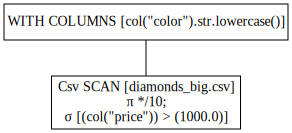

In [ ]:
q.show_graph()

In [ ]:
%%time

q.collect()

CPU times: user 2.35 s, sys: 178 ms, total: 2.53 s
Wall time: 1.54 s


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72
…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56


In [ ]:
%%time

q.collect(streaming=True)

<timed eval>:1: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.


CPU times: user 2.24 s, sys: 152 ms, total: 2.39 s
Wall time: 1.27 s


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72
…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56


### Заключение по Polars и Pandas

Нельзя сказать, что Polars во всех запросах сильно выигрывает у Pandas, но благодаря его появлению разработчики выпустили Pandas 2.0 - версию классической библиотеки с привычным синтаксисом, но гораздо более быстрой работой.

Про сравнение Pandas, Polars и Pandas 2.0 можно почитать [здесь](https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1).

# Введение в машинное обучение (основные понятия)

Основные понятия.

В нашем примере мы можем попробовать предсказать стоимость алмаза по его характеристикам.

* алмазы - *объекты*
* характеристики - *признаки*
* стоимость - *целевая переменная*

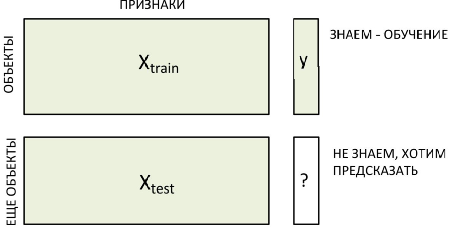

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$price = a + b\cdot carat + c\cdot depth,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

Пример плохо подобранных параметров $a, b$ модели
$$y = a + b\cdot x.$$

На рисунке
$$y = -30 + 7x.$$

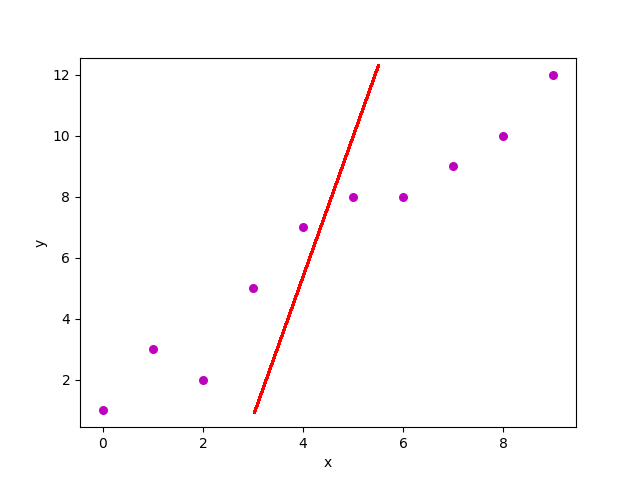

Пример хорошо подобранных параметров:
$$y = 0.5 + x.$$

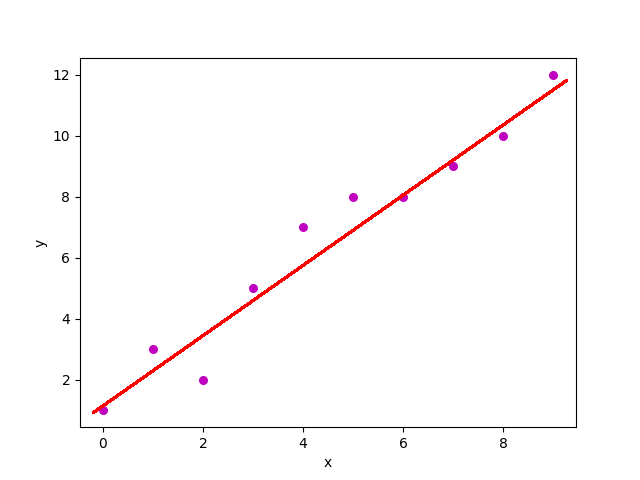

Функции для построения прогнозов бывают разные:

* линейные модели
* решающие правила (если $a$, то $b$)
* нейронные сети
* другие модели

Каждая модель хорошо работает в своих предположениях о данных, поэтому изучить распределение целевой переменной всегда очень полезно.

Обучим линейную регрессию предсказывать цену по числу карат.

In [ ]:
df = pd.read_csv(DIAMONDS_CATEGORY_DATASET)

In [ ]:
X = df[['carat']] # матрица объект-признак
y = df['price'] # целевая переменная

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

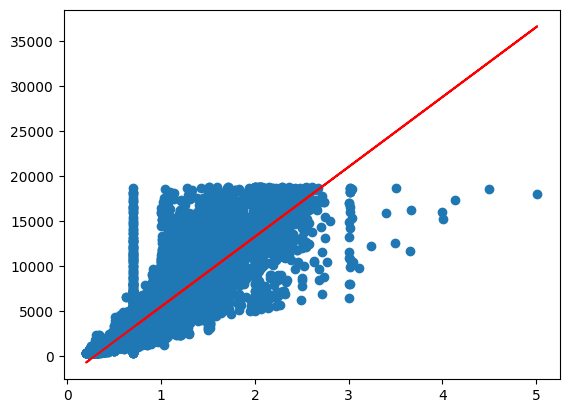

In [ ]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, pred)

1025.0975451762647

In [ ]:
np.mean(y)

np.float64(3931.718588480274)

## Анализ распределения столбцов (целевой переменной)

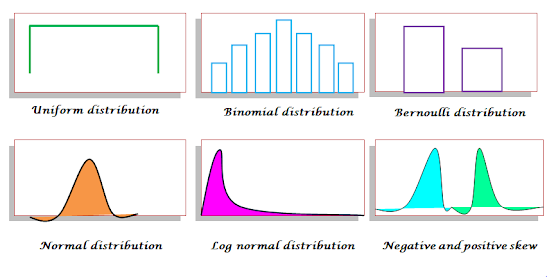

В основном в задачах регрессии мы ожидаем увидеть нормально распределенную целевую переменную. Многие модели заточены под нормальное распределение.

Но не только в этом дело...

<Axes: xlabel='price', ylabel='Count'>

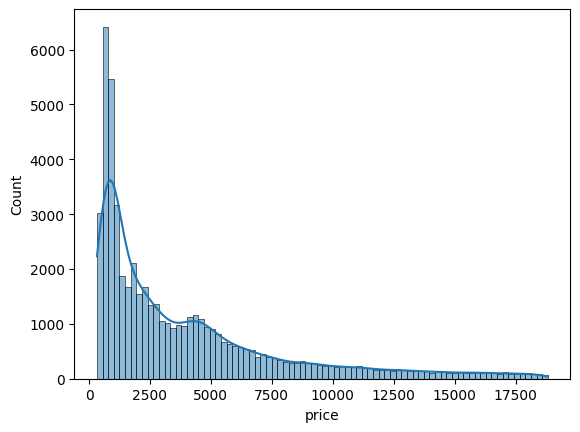

In [ ]:
sns.histplot(data = df['price'], kde = True)

<Axes: xlabel='price', ylabel='Count'>

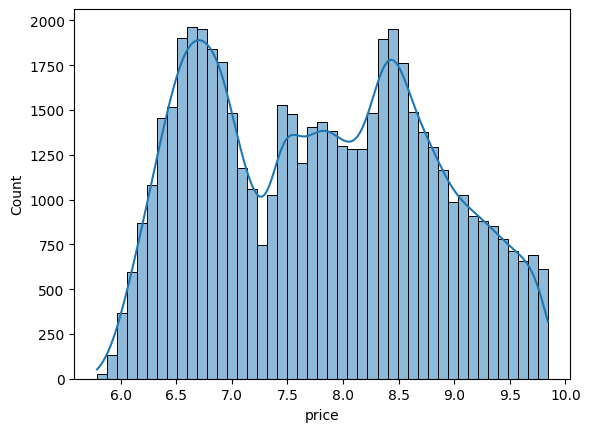

In [ ]:
sns.histplot(data = np.log(df['price']), kde = True)

Мы видим у распределения тяжелый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

Проверим это.

In [ ]:
mean_absolute_error(y[y < 10000], pred[y < 10000])

812.591939116374

In [ ]:
mean_absolute_error(y[y >= 10000], pred[y >= 10000])

3010.6355021043114

Действительно, ошибка на дорогих алмазах больше.

In [ ]:
X2 = df[['carat']]
y2 = df['depth']

lr = LinearRegression()
lr.fit(X2, y2)

LinearRegression()

In [ ]:
pred_depth = lr.predict(X2)

mean_absolute_error(y2, pred_depth), np.mean(y2)

(1.0074215822488028, np.float64(61.74943293793924))

<Axes: xlabel='depth', ylabel='Count'>

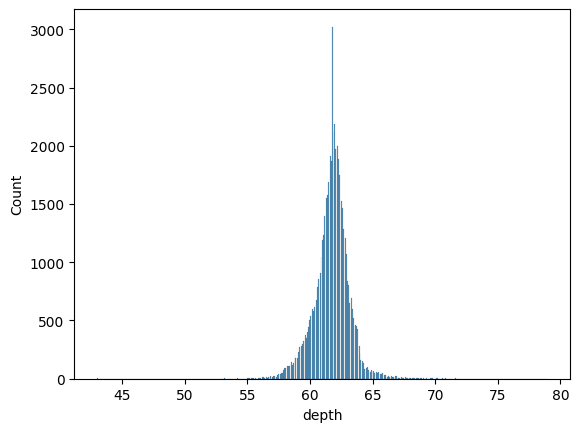

In [ ]:
sns.histplot(df.depth)

In [ ]:
len(y2[y2<60])/len(y2) # доля выборки

0.09279366377867847

In [ ]:
mean_absolute_error(y2[y2<60], pred_depth[y2<60])

2.7812013965752143

In [ ]:
len(y2[(y2 >= 60) & (y2 <= 63)])/len(y2) # доля выборки

0.7786412821180233

In [ ]:
mean_absolute_error(y2[(y2 >= 60) & (y2 <= 63)], pred_depth[(y2 >= 60) & (y2 <= 63)])

0.6017121217716944

## Задание 4

Будем решать задачу прогноза стоимости алмаза по его параметру `table`.

Обучите линейную регрессию для решения этой задачи и выведите на экран ошибку MAE.

In [ ]:
X3 = df[['table']]
y3 = df['price']

lr = LinearRegression()
lr.fit(X3, y3)

pred_price = lr.predict(X3)

print(f'MAE: {mean_absolute_error(y3, pred_price):.2f}')
print(f'Mean price: {np.mean(y3):.2f}')

MAE: 2987.50
Mean price: 3931.72


## Задание 5

Сколько процентов от среднего значения `price` составляет ошибка?

In [ ]:
print(f'MAE percent: {mean_absolute_error(y3, pred_price) / np.mean(y3) * 100:.1f} %')

MAE percent: 76.0 %


## Задание 6

Вычислите ошибку MAE для алмазов маленькой и большой стоимости отдельно:

* `price` < 10_000
* `price` >= 10_000

Какая из ошибок больше?

Как вы думаете почему?

In [ ]:
lil_price = (y3 < 10000)
big_price = (y3 >= 10000)
lil_price_mae = mean_absolute_error(y3[lil_price], pred_price[lil_price])
big_price_mae = mean_absolute_error(y3[big_price], pred_price[big_price])


print(f'lil price MAE: {lil_price_mae:.2f}')
print(f'big price MAE: {big_price_mae:.2f}')

lil price MAE: 2279.10
big price MAE: 9606.38


mae на больших ценах больше

Вывод
<br>
Распределение далеко от нормального и цен больше 10000 значительно меньше по количеству, чем цен до 10000.

<Axes: xlabel='price', ylabel='Count'>

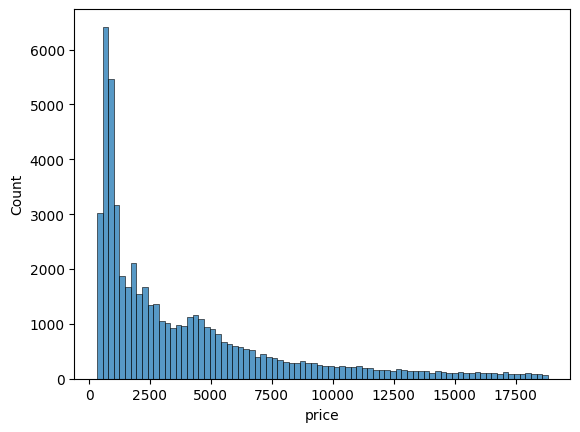

In [ ]:
sns.histplot(df.price)

Линеная модель была обучена в основном на ценах до 10000, так как их было больше.

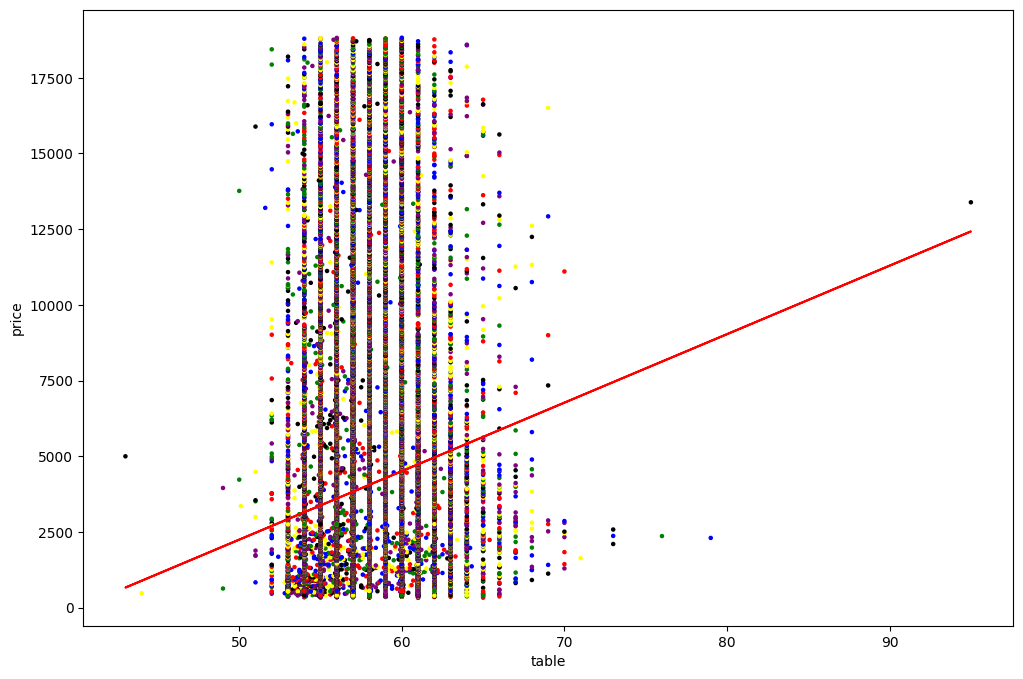

In [ ]:
import random

colors = np.array(['red', 'green', 'blue', 'yellow', 'purple', 'black'])
categories = np.array([random.randint(0, 5) for i in range(len(y3))])

plt.figure(figsize=(12,8))
plt.scatter(X3.values, y3, s=5, c=colors[categories])
plt.plot(X3.values, pred_price, c='red')
plt.xlabel('table')
plt.ylabel('price')
plt.show()

# SHAP

Обучение модели Градиентного бустинга с целевой переменной price

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

X = df.drop("price", axis=1)
y = df["price"]
y_bins = pd.qcut(y, q=10, labels=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_bins)
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
import shap
gb_explainer = shap.Explainer(gb_model)
gb_shap_values = gb_explainer(X_test)
shap.initjs()

## Сводная диаграмма

Суммарно на все объекты больше всех повлияли признаки y, z, clarity, x, carat.
<br>
1. Высокий 'y' значительно влияет на повышение значения price. Низкий 'y' также влияет на уменьшение price, но до определенного порога (по признаку 'y' видно что при значительном его уменьшении отрицательное влияние на price для многих объектов одинаковое - плотность объектов на участке шкалы повышается).
2. 'z' по общему влиянию на число объектов на втором месте, но его воздействие значительно меньше, чем 'y' и даже меньше чем clarity (шкала 'z' уже). Тем не менее, рост 'z' оказывает влияние на рост price.
3. clarity на третьем месте по числу объектов, на которые оказывает влияние. Но его влияение сильное - при увеличении clarity price уменьшается и наоборот.
4. увеличение или уменьшение 'x' слабо влияет на увеличение и уменьшение цена по сравнению с отсальными признаками. Большинство точек на шкале сконцентрированы в начале и точки, влияющие на рост и уменьшение цены перемешаны.
5. увеличение carat увеличивает цену, но уменьшение carat - уменьшает ее менее высоким темпом

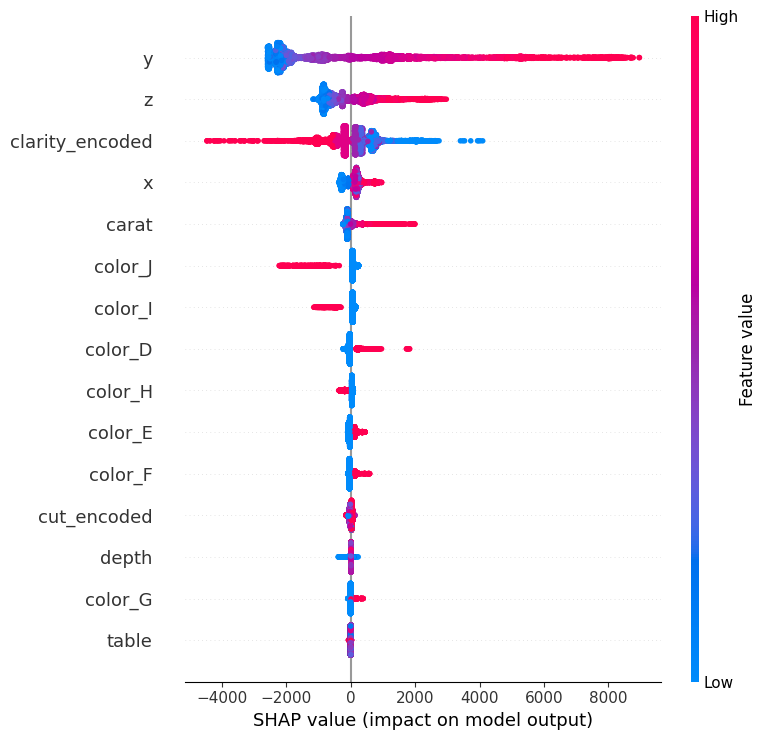

In [ ]:
shap.summary_plot(gb_shap_values, X_test)

## Пример предсказания цены на двух отдельных объектах

На этом алмазе
* размеры 'y' 'z' оказывают отрицательное влияние,
* 'x' и clarity малое положительное влияние,
* carat еще меньшее отрицательное

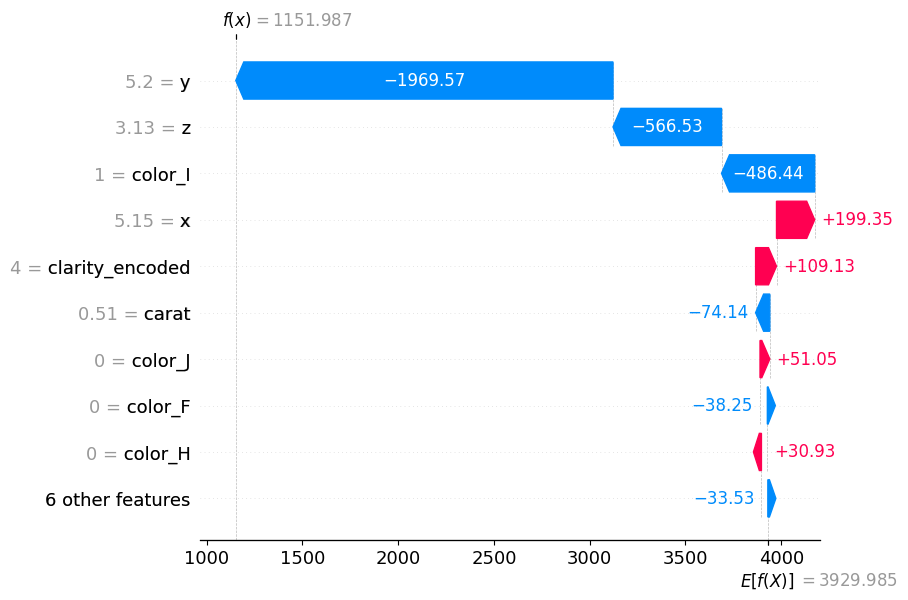

In [ ]:
shap.waterfall_plot(gb_shap_values[0])

На этом алмазе
* 'y' (больше предыдущего на 2.42) уже оказывает в три раза большее положительное влияние на рост. 'z' действует похожим образом
* 'x' увеличился на 2.41 и увеличил свое положительное влияние почти в 4 раза.
* Увеличенный carat уже оказывает положительное влияние на цену
* clarity (в предыдущем объекте VS2, в этом SI1) увеличила значние прозрачности и стала отрицательно влиять на цену


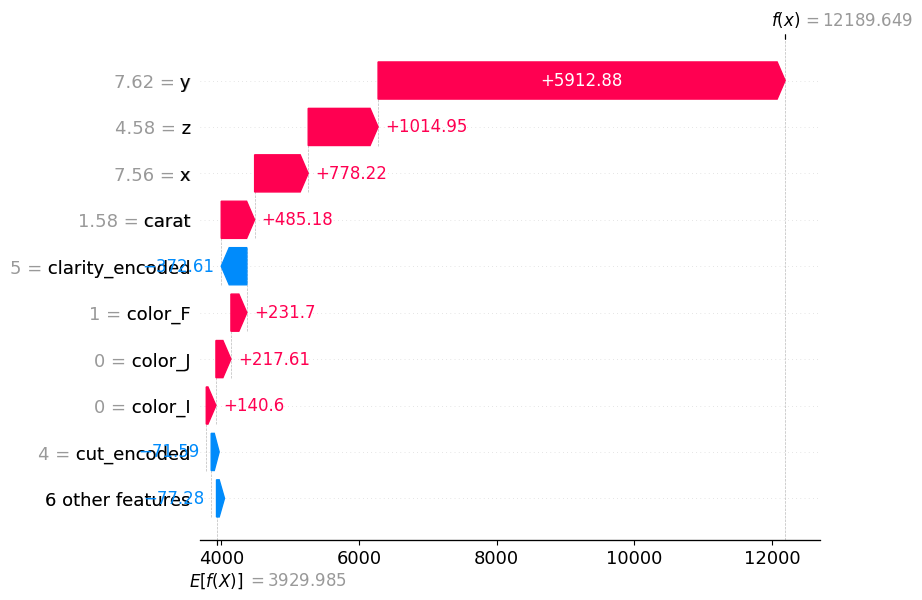

In [ ]:
shap.waterfall_plot(gb_shap_values[1000])